In [1]:
import pickle
import pandas as pd
with open('data_0930.pkl', 'rb') as f:
    df = pickle.load(f)

In [6]:
df['pred_sent'] = df['pred_label']=='LABEL_1'

In [7]:
rest_score = df.groupby('obj_key')['pred_sent'].mean().to_dict()

In [9]:
df['rest_score'] = df['obj_key'].apply(lambda x: rest_score[x])

In [11]:
(df.groupby('obj_key').count()['rest_score'] > 200).sum()

11069

In [12]:
check_num = (df.groupby('obj_key').count()['rest_score'] > 100).to_dict()

In [15]:
df['check_num'] = df['obj_key'].apply(lambda x: check_num[x])

In [17]:
tmp = df[df['check_num']]

In [18]:
goods = tmp[tmp['rest_score'] > 0.95]

In [19]:
unique_goods = goods.drop_duplicates('obj_key')

In [21]:
unique_goods[unique_goods['loc'].apply(lambda x: '성수동' in x)].head()

,obj_key,title,주차,category,loc,user_name,user_id,date_calendar,date_kor,visit_num,review,pred_label,pred_score,no_tag_review,pred_sent,rest_score,check_num
date_kor,,,,,,,,,,,,,,,,,
2023-08-27,NQV7HZ7a6PtoTN1w,현심야식당 성수점,True,이자카야,서울 성동구 성수동1가,민토르z,민토르z!@#$112!@#$494!@#$8,8.27.일,2023-08-27,1.0,와.. 인생 모츠나베! 이렇게 맛있다니 정말 감격했어요!!!! 정말 밥도둑 … 술 ...,LABEL_1,0.992322,와.. 인생 모츠나베! 이렇게 맛있다니 정말 감격했어요!!!! 정말 밥도둑 … 술 ...,True,0.975104,True
2023-08-25,rZ2pSiX85OD6ISx7,뚝도살롱,False,와인,서울 성동구 성수동1가,스피이드21171,스피이드21171!@#$12!@#$20!@#$0,8.25.금,2023-08-25,9.0,좋은 음악과 시원한 생맥~ 제일 좋아하는 먹태. 바질페스토 파스타와 즐거운 친구와의...,LABEL_1,0.992376,좋은 음악과 시원한 생맥~ 제일 좋아하는 먹태. 바질페스토 파스타와 즐거운 친구와의...,True,1.000000,True
2023-08-29,wUaiHUOb4VFjOc2b,금손,False,요리주점,서울 성동구 성수동2가,르리54,르리54!@#$27!@#$31!@#$0,8.29.화,2023-08-29,1.0,비오는 날에도 이용할 수 있는 루프탑과 다양한 전통주가 있는 신상 성수맛집 발견!...,LABEL_1,0.991895,비오는 날에도 이용할 수 있는 루프탑과 다양한 전통주가 있는 신상 성수맛집 발견!...,True,0.979021,True
2023-08-29,7OOuXu3UbeoLcrzY,긴밤,False,요리주점,서울 성동구 성수동1가,쇼바냥,쇼바냥!@#$1836!@#$9316!@#$141,8.29.화,2023-08-29,2.0,성수술집 서울숲맛집 긴밤 성수데이트 하이볼 생맥주 무제한❤️😀 맛있는 안주요리 오...,LABEL_1,0.991411,성수술집 서울숲맛집 긴밤 성수데이트 하이볼 생맥주 무제한❤️😀 맛있는 안주요리 오...,True,0.967914,True
2023-08-03,TeTi5z9gSfIxIRN0,숨은,True,와인,서울 성동구 성수동2가,개땅이,개땅이!@#$86!@#$295!@#$11,8.3.목,2023-08-03,1.0,와인 테이블 예약(카페x) 모던한 분위기에 조용히 대화 나누기 좋은 성수 와인바예요...,LABEL_1,0.992221,와인 테이블 예약(카페x) 모던한 분위기에 조용히 대화 나누기 좋은 성수 와인바예요...,True,0.960912,True


In [22]:
unique_goods[unique_goods['category'].apply(lambda x: '돈가스' in x)].head()

,obj_key,title,주차,category,loc,user_name,user_id,date_calendar,date_kor,visit_num,review,pred_label,pred_score,no_tag_review,pred_sent,rest_score,check_num
date_kor,,,,,,,,,,,,,,,,,
2023-08-26,82Guq4zDDwlO0Mt1,메종 아카이,False,돈가스,서울 종로구 명륜2가 181 2층,flflqnqn,flflqnqn!@#$261!@#$490!@#$1,8.26.토,2023-08-26,1.0,"'프리미엄 가츠동'과 '일식풍 샤브샤브' 가 맛있는 혜화역 맛집, 메종아카이❤️ 메...",LABEL_1,0.992330,"'프리미엄 가츠동'과 '일식풍 샤브샤브' 가 맛있는 혜화역 맛집, 메종아카이❤️ 메...",True,0.974138,True
2023-08-02,xY3KeBKwsd3uZPa7,이키가이,False,돈가스,서울 성동구 성수동1가,김나봉ㅇ,김나봉ㅇ!@#$57!@#$191!@#$4,8.2.수,2023-08-02,1.0,"혼밥하기도, 데이트하기에도 넘나 좋은 돈카츠집 ♥ 갓성비 맛집이에요 요런 두껍고 ...",LABEL_1,0.990034,"혼밥하기도, 데이트하기에도 넘나 좋은 돈카츠집 ♥ 갓성비 맛집이에요 요런 두껍고 ...",True,0.982759,True
2023-07-29,bK7ij7DtmloAV3PK,소바의온도 성신여대점,True,돈가스,서울 성북구 삼선동4가,소일6,소일6!@#$73!@#$54!@#$2,7.29.토,2023-07-29,1.0,"여기 소바진짜맛있어요!! 면이랑 국물이 진짜 예술 그런데, 지난번 방문했을때는 돈...",LABEL_1,0.772345,"여기 소바진짜맛있어요!! 면이랑 국물이 진짜 예술 그런데, 지난번 방문했을때는 돈...",True,0.954023,True
2023-09-04,2ijBgoWHNiQAp9Qy,KATSU97,True,돈가스,서울 관악구 봉천동,나다옴,나다옴!@#$18!@#$93!@#$0,9.4.월,2023-09-04,2.0,재방문하는데 역시나 기대를 저버리지 않는 맛!! 안심가츠는 언제 먹어도 정말 맛있네...,LABEL_1,0.992330,재방문하는데 역시나 기대를 저버리지 않는 맛!! 안심가츠는 언제 먹어도 정말 맛있네...,True,0.962366,True
2023-09-03,P64zIE9eQ74GxxU4,카츠무명,False,돈가스,서울 성북구 동선동3가,리아23,리아23!@#$404!@#$286!@#$5,9.3.일,2023-09-03,2.0,믿고 먹는 맛집 카츠무명!!😆 오늘은 냉모밀도 시켜먹었는데 넘 시원하고 맛있었어요!...,LABEL_1,0.992193,믿고 먹는 맛집 카츠무명!!😆 오늘은 냉모밀도 시켜먹었는데 넘 시원하고 맛있었어요!...,True,0.966292,True


# Try Embedding

In [23]:
import pickle
with open('geocoded.pkl', 'rb') as f:
    geocoded = pickle.load(f)

In [27]:
df['geoloc'] = df['obj_key'].apply(lambda x: geodict[x])

NameError: name 'geodict' is not defined

In [ ]:
df['geo_x'] = df['obj_key'].apply(lambda x: geo_x[x])
df['geo_y'] = df['obj_key'].apply(lambda x: geo_y[x])

In [42]:
result_1 = df[df['pred_label'] == 'LABEL_1'].groupby('obj_key')['pred_score'].agg(['mean', 'std'])
result_0 = df[df['pred_label'] == 'LABEL_0'].groupby('obj_key')['pred_score'].agg(['mean', 'std'])


In [38]:
results = df['obj_key'].unique()

In [47]:
result = pd.DataFrame(index = results, columns = ['pos_mean', 'pos_std', 'neg_mean', 'neg_std'])
result['pos_mean'] = 0.5
result['pos_std'] = 0
result['neg_mean'] = 0.5
result['neg_std'] = 0

In [58]:
result.loc[result_1.index[i]]['pos_mean']

0.5

In [61]:
for i in range(result_1.shape[0]):
    result.loc[result_1.index[i], ['pos_mean']] = result_1.iloc[i]['mean']
    result.loc[result_1.index[i], ['pos_std']] = result_1.iloc[i]['std']
for i in range(result_0.shape[0]):
    result.loc[result_0.index[i], ['neg_mean']] = result_0.iloc[i]['mean']
    result.loc[result_0.index[i], ['neg_std']] = result_0.iloc[i]['std']

/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/1995006686.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.01086440387489571' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[result_1.index[i], ['pos_std']] = result_1.iloc[i]['std']
/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/1995006686.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.1926168521131285' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[result_0.index[i], ['neg_std']] = result_0.iloc[i]['std']


In [62]:
result

,pos_mean,pos_std,neg_mean,neg_std
9jSAo3wcmAWVIYuU,0.943718,0.068678,0.690788,0.161609
UII3kDoLmcmhARYR,0.951273,0.081569,0.868891,0.191311
eB7dMKhG9bpmBpkg,0.850559,0.190000,0.693454,0.176074
h15TqZLykPaWlKxR,0.914962,0.103603,0.693879,0.152256
WzNQr2pNJHgBpj1O,0.947535,0.065148,0.517827,0.000000
...,...,...,...,...
hn8aToDBAGysPSCk,0.974656,0.026252,0.500000,0.000000
FaUmuuTNVLH3UpRq,0.928528,0.138650,0.733707,0.228303
K7D6uviRFxY8Q4Ub,0.893314,0.137673,0.843876,0.175447
QtqyUdKeV2z6CFnR,0.913930,0.117639,0.709274,0.184471


In [63]:
df['pos_mean'] = df['obj_key'].apply(lambda x: result.loc[x]['pos_mean'])
df['pos_std'] = df['obj_key'].apply(lambda x: result.loc[x]['pos_std'])
df['neg_mean'] = df['obj_key'].apply(lambda x: result.loc[x]['neg_mean'])
df['neg_std'] = df['obj_key'].apply(lambda x: result.loc[x]['neg_std'])

In [65]:
df['review_length'] = df['no_tag_review'].apply(lambda x: len(x))

In [70]:
# tmp_rev = df.groupby('obj_key')['review_length'].mean().to_dict()
tmp_rev2 = df.groupby('obj_key')['review_length'].std().to_dict()

In [71]:
df['review_mean'] = df['obj_key'].apply(lambda x: tmp_rev[x])
df['review_std'] = df['obj_key'].apply(lambda x: tmp_rev2[x])

In [72]:
with open('naver_ppd_2_noreview', 'rb') as f:
    noreview = pickle.load(f)

In [82]:
df_unique = df.drop_duplicates('obj_key')

In [112]:
df_unique.drop('review_length', axis=1, inplace=True)

/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/947765907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.drop('review_length', axis=1, inplace=True)


In [102]:
df_unique.set_index('obj_key', inplace=True)

In [109]:
cats = df_unique['category'].unique()
cats = list(cats)

In [110]:
df_unique['cat_num'] = df_unique['category'].apply(lambda x: cats.index(x))

/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/2658942616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['cat_num'] = df_unique['category'].apply(lambda x: cats.index(x))


In [113]:
df_unique

,title,주차,category,rest_score,geo_x,geo_y,pos_mean,pos_std,neg_mean,neg_std,review_mean,review_std,cat_num
obj_key,,,,,,,,,,,,,
9jSAo3wcmAWVIYuU,봉평시골메밀촌 본점,False,막국수,0.706897,127.0162810,37.6438891,0.943718,0.068678,0.690788,0.161609,23.793103,53.817025,0
UII3kDoLmcmhARYR,큰손칼국수,False,"칼국수,만두",0.937500,127.1060392,37.5073206,0.951273,0.081569,0.868891,0.191311,20.890625,23.759454,1
eB7dMKhG9bpmBpkg,조아해낙지,True,한식,0.800000,126.8236057,37.5626708,0.850559,0.190000,0.693454,0.176074,14.640000,23.766012,2
h15TqZLykPaWlKxR,소문난 고향순대국 전문점,False,"순대,순댓국",0.782313,127.0369286,37.5867114,0.914962,0.103603,0.693879,0.152256,11.312925,31.502729,3
WzNQr2pNJHgBpj1O,북창터,False,한식,0.727273,126.9768110,37.5622394,0.947535,0.065148,0.517827,0.000000,11.454545,9.913260,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
hn8aToDBAGysPSCk,칼짚통삼겹살,False,돼지고기구이,1.000000,127.0767290,37.6287849,0.974656,0.026252,0.500000,0.000000,11.750000,7.365460,11
FaUmuuTNVLH3UpRq,실내포차 사부작,False,포장마차,0.903226,126.9288292,37.4987815,0.928528,0.138650,0.733707,0.228303,48.000000,72.497356,38
K7D6uviRFxY8Q4Ub,엠테이블,False,중식당,0.524752,127.0981638,37.5110794,0.893314,0.137673,0.843876,0.175447,23.930693,41.501869,8


In [114]:
noreview

[{'obj_key': '9jSAo3wcmAWVIYuU',
  'title': '봉평시골메밀촌 본점',
  'info': ['주소\n서울 강북구 삼양로 454\n우이신설가오리역 1번 출구에서246m',
   '영업시간\n영업 중\n19:40에 영업 종료\n19시 40분에 영업 종료\n월\n11:00 - 19:40\n화\n정기휴무 (매주 화요일)\n수\n11:00 - 19:40\n목\n11:00 - 19:40\n금\n11:00 - 19:40\n토\n11:00 - 19:40\n일\n11:00 - 19:40\n접기',
   '02-908-9551복사',
   '결제수단\n제로페이',
   '정보 수정 제안\n정보 수정 제안하기',
   '사장님, 플레이스를\n무료로 직접 관리하세요!\n권한 받기'],
  'menu': ['메밀 물막국수\n8,000원',
   '메밀 비빔막국수\n8,000원',
   '메밀 꿩찐만두\n9,000원',
   '메밀전\n12,000원',
   '메밀 꿩떡만두국\n9,000원',
   '메밀 칼국수\n8,500원'],
  'review_num': ['별점\n4.45/5', '방문자리뷰 480', '블로그리뷰 34'],
  'degree': '',
  'category': '막국수',
  'loc': '서울 강북구 수유동'},
 {'obj_key': 'UII3kDoLmcmhARYR',
  'title': '큰손칼국수',
  'info': ['주소\n서울 송파구 백제고분로41길 21-24\n89석촌역 1번 출구에서238m',
   '영업시간\n영업 전\n11:00에 영업 시작\n11시 0분에 영업 시작\n화\n11:00 - 21:00\n수\n11:00 - 21:00\n목\n11:00 - 21:00\n금\n11:00 - 21:00\n토\n11:00 - 21:00\n일\n정기휴무 (매주 일요일)\n월\n11:00 - 21:00\n접기',
   '사장님, 플레이스를\n무료로 직접 관리하세요!\n권한 받기'],
  'menu': ['옛날손칼국수\n7

In [117]:
import tqdm
for i in tqdm.tqdm(range(len(noreview))):
    try:
        df_unique.loc[noreview[i]['obj_key'], 'review_num'] = [x for x in noreview[i]['review_num'] if '방문자' in x][0]
    except:
        pass

  0%|          | 0/128578 [00:00<?, ?it/s]/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/3771791406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc[noreview[i]['obj_key'], 'review_num'] = [x for x in noreview[i]['review_num'] if '방문자' in x][0]
/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/3771791406.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '방문자리뷰 480' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_unique.loc[noreview[i]['obj_key'], 'review_num'] = [x for x in noreview[i]['review_num'] if '방문자' in x][0]
/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747

In [122]:
df_unique['review_num'] = df_unique['review_num'].apply(lambda x: float(x.split(' ')[1].replace(',', '')) if type(x)==str else x)

In [130]:
df_unique = df_unique.dropna(subset=['title'])

In [131]:
df_unique

,title,주차,category,rest_score,geo_x,geo_y,pos_mean,pos_std,neg_mean,neg_std,review_mean,review_std,cat_num,review_num
obj_key,,,,,,,,,,,,,,
9jSAo3wcmAWVIYuU,봉평시골메밀촌 본점,False,막국수,0.706897,127.0162810,37.6438891,0.943718,0.068678,0.690788,0.161609,23.793103,53.817025,0.0,480.0
UII3kDoLmcmhARYR,큰손칼국수,False,"칼국수,만두",0.937500,127.1060392,37.5073206,0.951273,0.081569,0.868891,0.191311,20.890625,23.759454,1.0,247.0
eB7dMKhG9bpmBpkg,조아해낙지,True,한식,0.800000,126.8236057,37.5626708,0.850559,0.190000,0.693454,0.176074,14.640000,23.766012,2.0,235.0
h15TqZLykPaWlKxR,소문난 고향순대국 전문점,False,"순대,순댓국",0.782313,127.0369286,37.5867114,0.914962,0.103603,0.693879,0.152256,11.312925,31.502729,3.0,633.0
WzNQr2pNJHgBpj1O,북창터,False,한식,0.727273,126.9768110,37.5622394,0.947535,0.065148,0.517827,0.000000,11.454545,9.913260,2.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hn8aToDBAGysPSCk,칼짚통삼겹살,False,돼지고기구이,1.000000,127.0767290,37.6287849,0.974656,0.026252,0.500000,0.000000,11.750000,7.365460,11.0,133.0
FaUmuuTNVLH3UpRq,실내포차 사부작,False,포장마차,0.903226,126.9288292,37.4987815,0.928528,0.138650,0.733707,0.228303,48.000000,72.497356,38.0,87.0
K7D6uviRFxY8Q4Ub,엠테이블,False,중식당,0.524752,127.0981638,37.5110794,0.893314,0.137673,0.843876,0.175447,23.930693,41.501869,8.0,170.0


In [133]:
with open('naver_ppd_3_unique.pkl', 'rb') as f:
    price_data = pickle.load(f)

In [144]:
dict_price = {}
for rest in tqdm.tqdm(price_data):
    dict_price[rest['obj_key']] = squeezed2dist(rest['menu_squeeze'])

100%|██████████| 127399/127399 [00:01<00:00, 81047.62it/s]


In [152]:
for i in range(df_unique.shape[0]):
    try:
        tmp = dict_price[df_unique.index[i]]
    except:
        dict_price[df_unique.index[i]] = [0]*11

In [155]:
for i in range(11):
    df_unique['prices_' + str(i)] = pd.Series(df_unique.index, index = df_unique.index).apply(lambda x: dict_price[x][i])

/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/3862920655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['prices_' + str(i)] = pd.Series(df_unique.index, index = df_unique.index).apply(lambda x: dict_price[x][i])
/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/3862920655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['prices_' + str(i)] = pd.Series(df_unique.index, index = df_unique.index).apply(lambda x: dict_price[x][i])
/var/folders/01/sbd8

In [143]:
def squeezed2dist(menuprice):
    prices = [x[1] for x in menuprice]
    standards = [0, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 60000, 80000, 100000, 100000000]
    nums = [0] * (len(standards)-1)
    for price in prices:
        for j in range(len(standards)-1):
            if type(price) == int:
                if price >= standards[j] and standards[j+1]:
                    nums[j] +=1
    return nums

In [18]:
geo_x = {}
geo_y = {}
for i in range(len(geocoded)):
    geo_x[geocoded[i][1]] = geocoded[i][3]
    geo_y[geocoded[i][1]] = geocoded[i][4]

# Clustering

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [160]:
n_clusters = 10
random_state = 42

kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

In [164]:
df_unique['주차'] = df_unique['주차'].astype(int)

/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/3756093811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['주차'] = df_unique['주차'].astype(int)


In [166]:
df_float = df_unique.drop(['title', 'category'], axis=1)

In [169]:
df_float.fillna(0, inplace = True)

In [170]:
kmeans.fit(df_float)

/Users/david/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

/Users/david/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/david/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/david/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/david/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

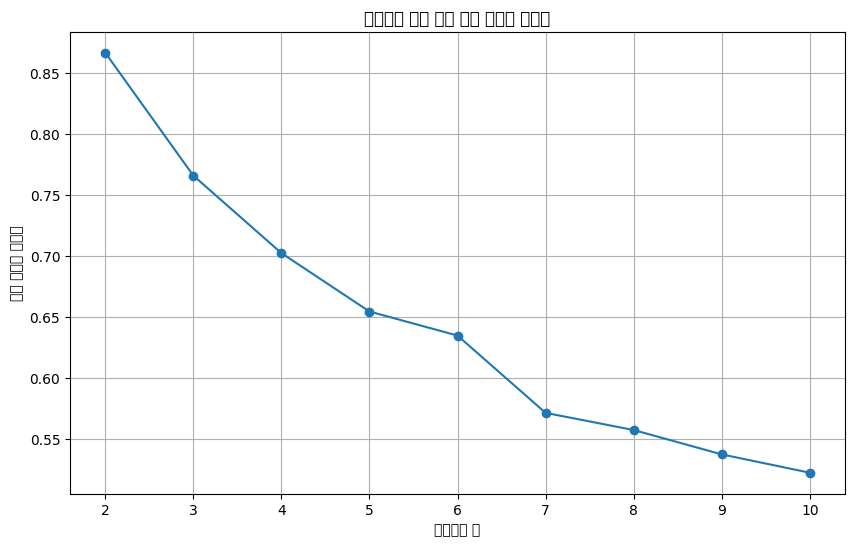

In [185]:
# 클러스터 수 범위 정의
cluster_range = range(2, 11)  # 클러스터 수 범위 (2부터 10까지)

# 각 클러스터 수에 대한 실루엣 스코어 저장할 리스트 초기화
silhouette_scores = []

# 각 클러스터 수에 대한 K-Means 클러스터링 수행 및 실루엣 스코어 계산
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_float)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_float, labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 스코어 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('클러스터 수')
plt.ylabel('평균 실루엣 스코어')
plt.title('클러스터 수에 따른 평균 실루엣 스코어')
plt.grid(True)
plt.show()

In [187]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_float)

In [188]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN()

In [190]:
df_unique['dbscan'] = dbscan.labels_

/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/2595498842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['dbscan'] = dbscan.labels_


In [195]:
df_unique[df_unique['dbscan']!=-1]

,title,주차,category,rest_score,geo_x,geo_y,pos_mean,pos_std,neg_mean,neg_std,...,prices_3,prices_4,prices_5,prices_6,prices_7,prices_8,prices_9,prices_10,cluster,dbscan
obj_key,,,,,,,,,,,,,,,,,,,,,
sMbkwn8BHGG9d7XQ,도덕과 규범,0,"카페,디저트",1.000000,126.9369065,37.5457639,0.989946,0.002422,0.500000,0.000000,...,0,0,0,0,0,0,0,0,6,0
8fXvaiMWE0Fy5BqY,디커피 혜화점,0,카페,1.000000,126.9983348,37.5833353,0.973500,0.026718,0.500000,0.000000,...,0,0,0,0,0,0,0,0,6,1
xVkSsGKhEHsnF1hz,원래는 치킨집을 할려고 했었다 왕십리점,0,종합분식,0.000000,127.0324735,37.5622145,0.500000,0.000000,0.517827,0.000000,...,0,0,0,0,0,0,0,0,6,2
t26F74fjvIbg8WuY,카페조우,0,"카페,디저트",1.000000,126.8644781,37.5334343,0.992196,NaN,0.500000,0.000000,...,0,0,0,0,0,0,0,0,6,1
Q1kXL8mGqPu25MvG,스타벅스 압구정역점,1,카페,0.719486,127.0281253,37.5267612,0.906868,0.135967,0.691176,0.163493,...,8,8,8,5,2,0,0,0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jBZvOGd9Xht4xIW5,사또양념치킨공덕1분점,0,"치킨,닭강정",1.000000,126.9591395,37.5480621,0.953044,0.056471,0.500000,0.000000,...,0,0,0,0,0,0,0,0,6,1
2x4QdVoXJb2pqpQk,부어치킨 남구로역점,0,"치킨,닭강정",1.000000,126.8906245,37.4839154,0.914511,0.075682,0.500000,0.000000,...,0,0,0,0,0,0,0,0,6,49
QZWn0QdhKacCqFoD,집밥생각,0,한식,1.000000,126.8515554,37.5240641,0.979100,0.017496,0.500000,0.000000,...,0,0,0,0,0,0,0,0,6,1


In [171]:
df_unique['cluster'] = kmeans.labels_

/var/folders/01/sbd8sdsx6rs7y5531n9wfb3h0000gp/T/ipykernel_47747/3773142545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['cluster'] = kmeans.labels_


In [183]:
df_unique['cluster'].describe()

count    111034.000000
mean          4.323405
std           2.291486
min           0.000000
25%           2.000000
50%           6.000000
75%           6.000000
max           9.000000
Name: cluster, dtype: float64

In [196]:
af = AffinityPropagation()
af.fit(df_float)

: 

In [ ]:
df_unique['AP'] = af.labels_